```
Data Structure:
cycle:	top level structure array containing the charge, discharge and impedance operations
	type: 	operation  type, can be charge, discharge or impedance
	ambient_temperature:	ambient temperature (degree C)
	time: 	the date and time of the start of the cycle, in MATLAB  date vector format
	
    data:	data structure containing the measurements
    
	   for charge the fields are:
                Voltage_measured: 	    Battery terminal voltage (Volts)
                Current_measured:	    Battery output current (Amps)
                Temperature_measured: 	Battery temperature (degree C)
                Current_charge:		    Current measured at charger (Amps)
                Voltage_charge:		    Voltage measured at charger (Volts)
                Time:			        Time vector for the cycle (secs)
                
	   for discharge the fields are:
                Voltage_measured: 	    Battery terminal voltage (Volts)
                Current_measured:	    Battery output current (Amps)
                Temperature_measured: 	Battery temperature (degree C)
                Current_load:		    Current measured at load (Amps)
                Voltage_load:		    Voltage measured at load (Volts)
                Time:			        Time vector for the cycle (secs)
                Capacity:		        Battery capacity (Ahr) for discharge till 2.7V 
                
	   for impedance the fields are:
                Sense_current:		    Current in sense branch (Amps)
                Battery_current:	    Current in battery branch (Amps)
                Current_ratio:		    Ratio of the above currents 
                Battery_impedance:	    Battery impedance (Ohms) computed from raw data
                Rectified_impedance:	Calibrated and smoothed battery impedance (Ohms) 
                Re:			            Estimated electrolyte resistance (Ohms)
                Rct:			        Estimated charge transfer resistance (Ohms)
```

In [2]:
from scipy.io import loadmat

bs_all = [
    'B0005',
    'B0006',
    'B0007',
    'B0018',
    'B0025',
    'B0026',
    'B0027',
    'B0028',
    'B0029',
    'B0030',
    'B0031',
    'B0032',
    'B0033',
    'B0034',
    'B0036',
    'B0038',
    'B0039',
    'B0040',
    'B0041',
    'B0042',
    'B0043',
    'B0044',
    'B0045',
    'B0046',
    'B0047',
    'B0048',
    'B0049',
    'B0050',
    'B0051',
    'B0052',
    'B0053',
    'B0054',
    'B0055',
    'B0056',
]

bs = [
    'B0005',
    'B0006',
    'B0007',
    'B0018'
]

ds = []
for b in bs:
    ds.append(loadmat(f'DATA/{b}.mat'))
    

In [3]:
types = []
times = []
ambient_temperatures = []
datas = []

for i in range(len(ds)):
    x = ds[i][bs[i]]["cycle"][0][0][0]
    ambient_temperatures.append(x['ambient_temperature'])
    types.append(x['type'])
    times.append(x['time'])
    datas.append(x['data'])

In [4]:
for i in range(len(ds)):
    print(f'Battery: {bs[i]}')
    print(f'Cycles: {datas[i].size}')
    print()

Battery: B0005
Cycles: 616

Battery: B0006
Cycles: 616

Battery: B0007
Cycles: 616

Battery: B0018
Cycles: 319



In [5]:
# # Example data
# print(f'Ambient Temp: {ambient_temperature[0]}')
# print(f'Type: {type[0]}')
# print(f'Time: {time[0]}')
# print('Data:')
# print('\tVoltage_measured: ', data[0]['Voltage_measured'])
# print('\tCurrent_measured: ', data[0]['Current_measured'])
# print('\tTemperature_measured: ', data[0]['Temperature_measured'])
# print('\tCurrent_charge: ', data[0]['Current_charge'])
# print('\tVoltage_charge: ', data[0]['Voltage_charge'])
# print('\tTime: ', data[0]['Time'])

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Charge All Cycles

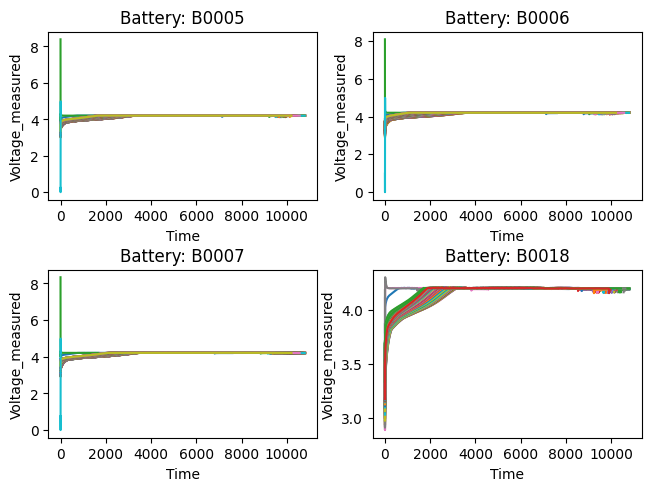

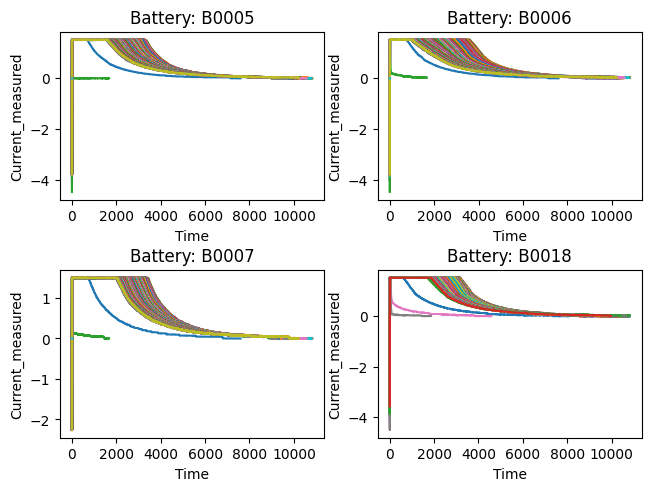

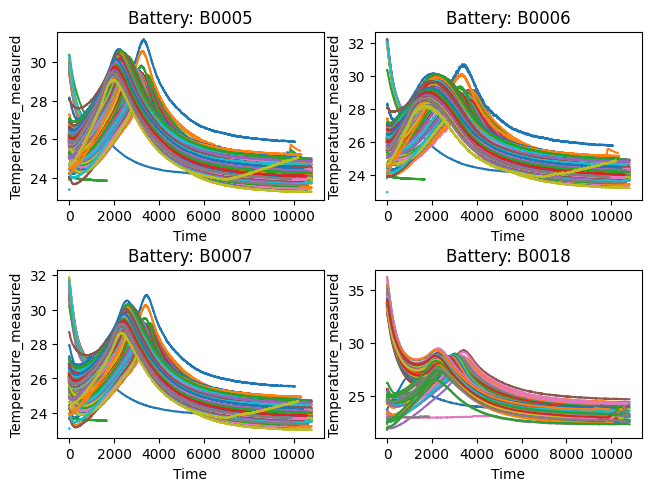

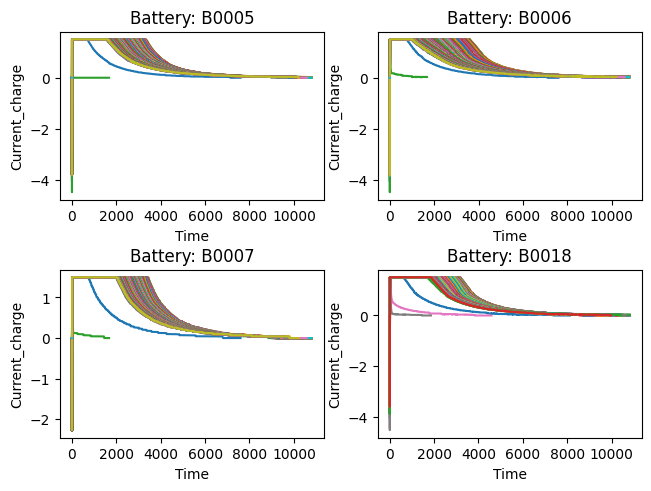

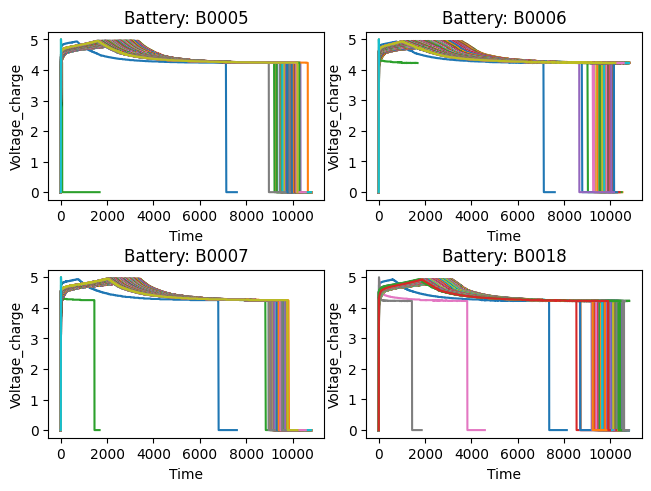

In [7]:
params = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_charge', 'Voltage_charge']

# for i in range(data.size):
#     if type[i] == 'charge':
#         plt.plot(data[i]['Time'][0][0][0], data[i]['Voltage_measured'][0][0][0])
#         plt.xlabel('Time')
#         plt.ylabel('Voltage_measured')

for p in params:
    fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
    param = p
    for i in range(len(bs)):
        for j in range(datas[i].size):
            if types[i][j] == 'charge':

                if i % 2 == 0:
                    axs[i // 2, 0].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0])
                    axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
                else:
                    axs[i // 2, 1].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0])
                    axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
    for ax in axs.flat:
        ax.set(ylabel = param, xlabel = 'Time')
    fig.tight_layout(pad = 0.3)

## Charge First and Last Cycles

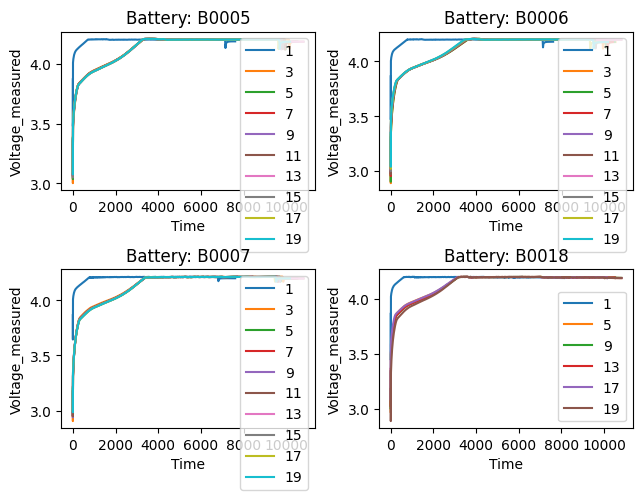

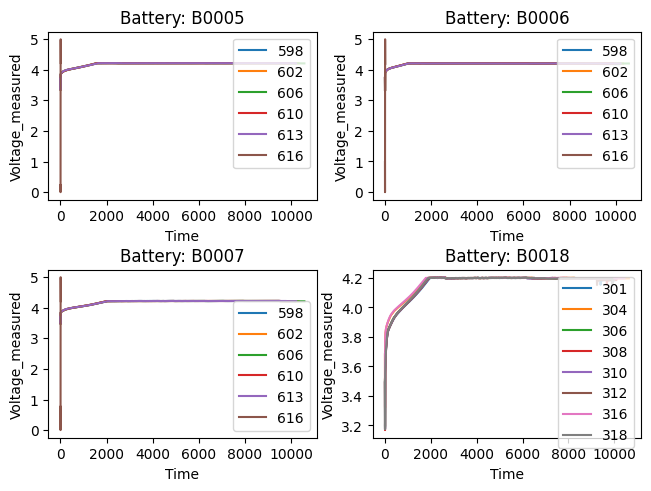

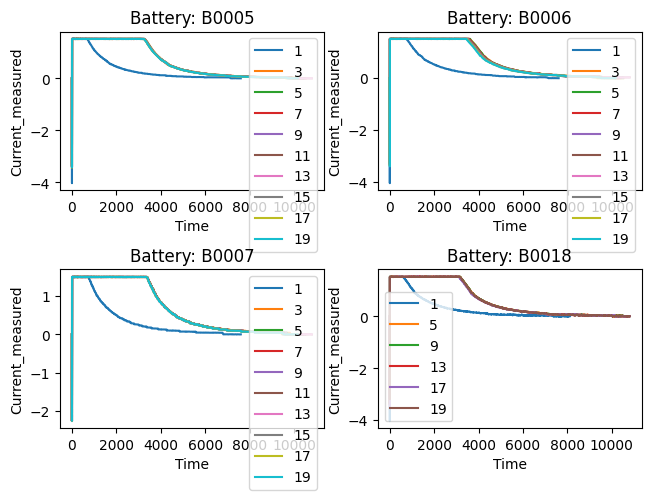

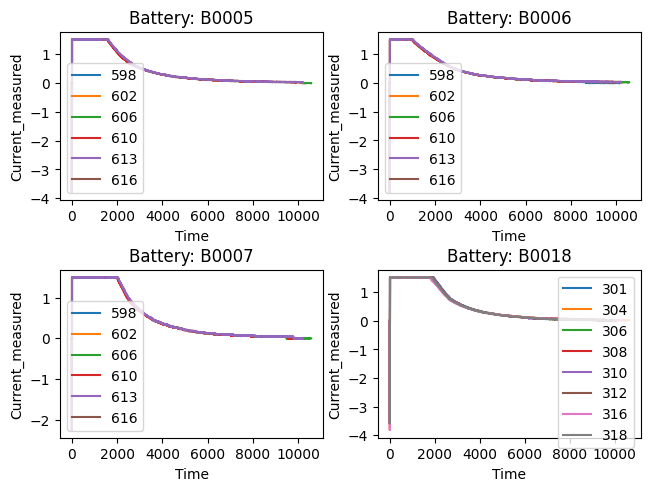

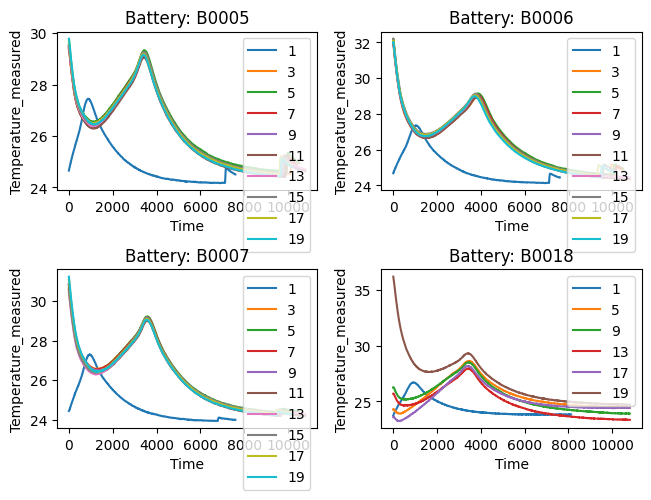

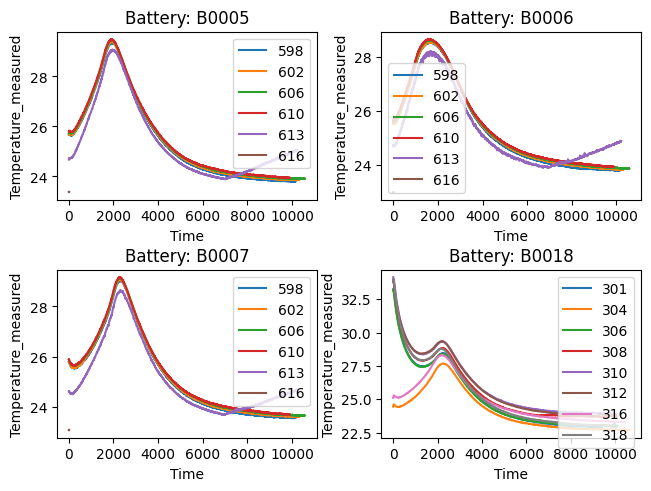

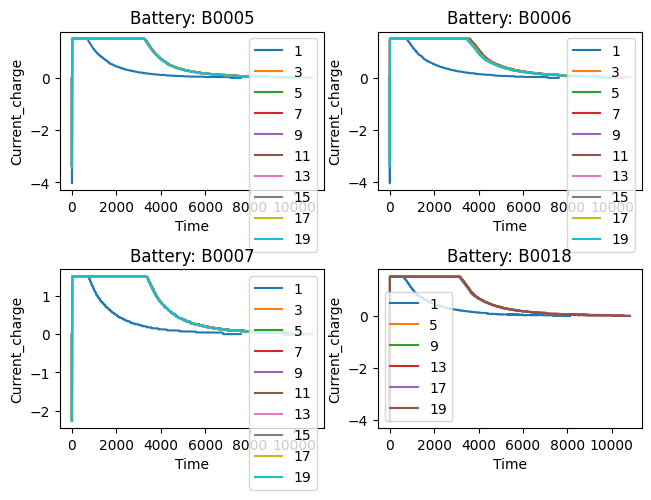

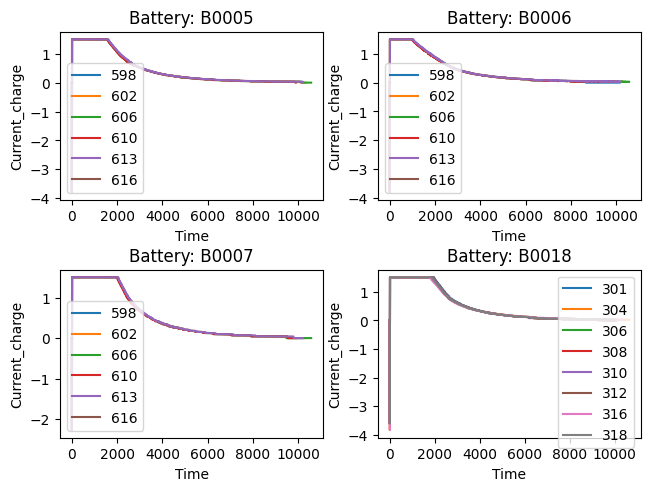

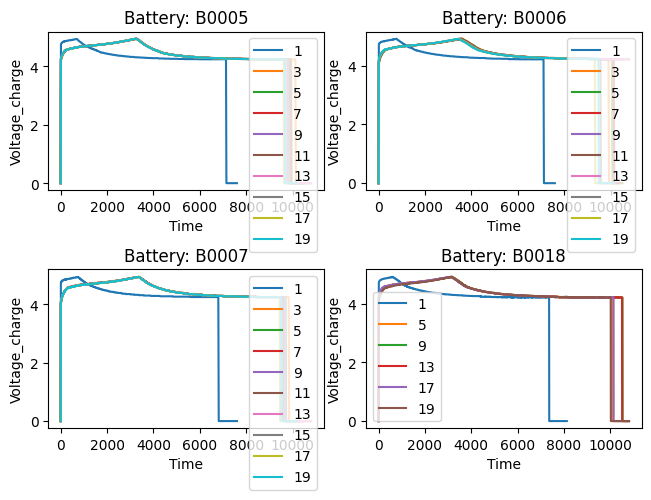

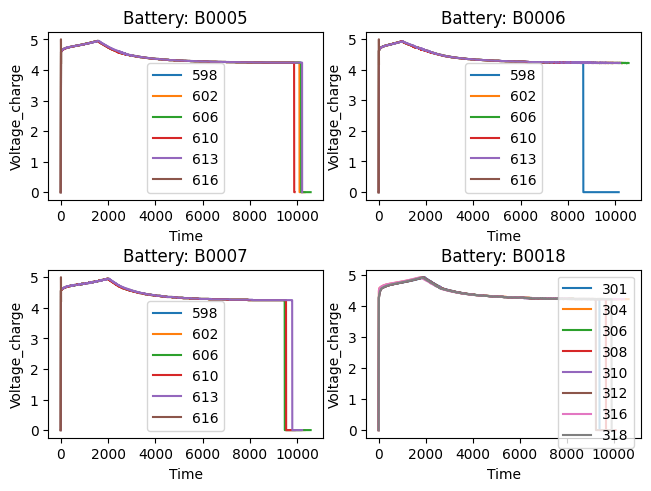

In [8]:
for p in params:
    
    # Printing first cycles
    
    fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
    param = p
    for i in range(len(bs)):
        for j in range(20):
            if types[i][j] == 'charge':
                if i % 2 == 0:
                    axs[i // 2, 0].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], label = f'{j + 1}')
                    axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 0].legend()
                else:
                    axs[i // 2, 1].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], label = f'{j + 1}')
                    axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 1].legend()
    for ax in axs.flat:
        ax.set(ylabel = param, xlabel = 'Time')
    fig.tight_layout(pad = 0.3)

    # Printing last cycles

    fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
    for i in range(len(bs)):
        for j in range(datas[i].size - 20, datas[i].size):
            if types[i][j] == 'charge':
                if i % 2 == 0:
                    axs[i // 2, 0].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], label = f'{j + 1}')
                    axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 0].legend()
                else:
                    axs[i // 2, 1].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], label = f'{j + 1}')
                    axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 1].legend()

    for ax in axs.flat:
        ax.set(ylabel = param, xlabel = 'Time')
    fig.tight_layout(pad = 0.3)

## Discharge All Cycles

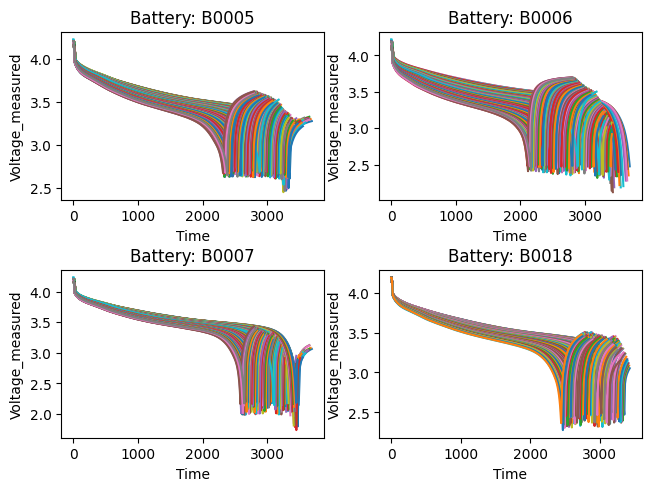

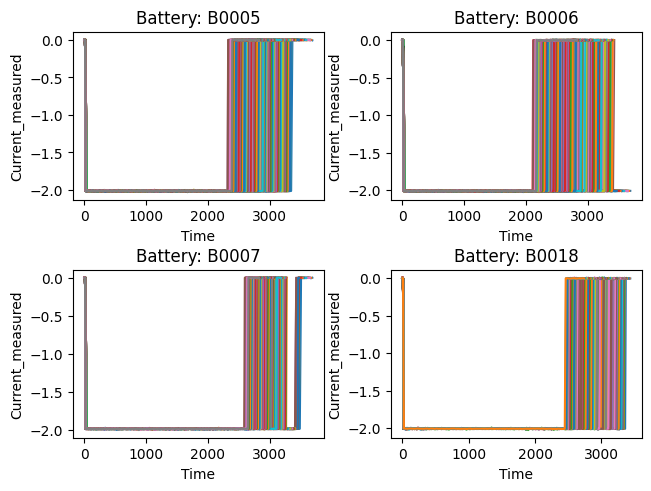

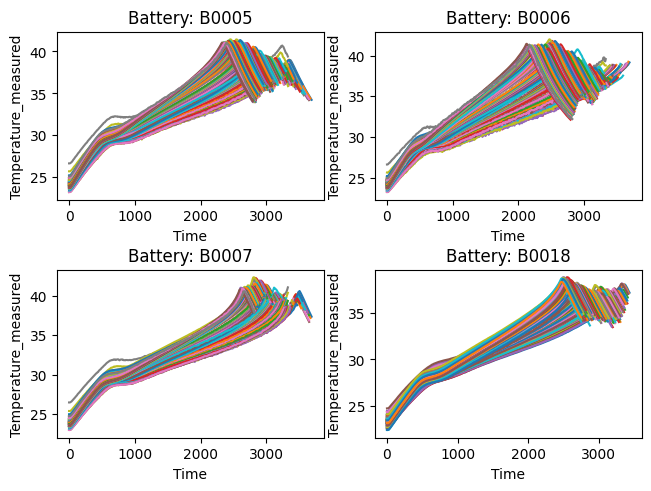

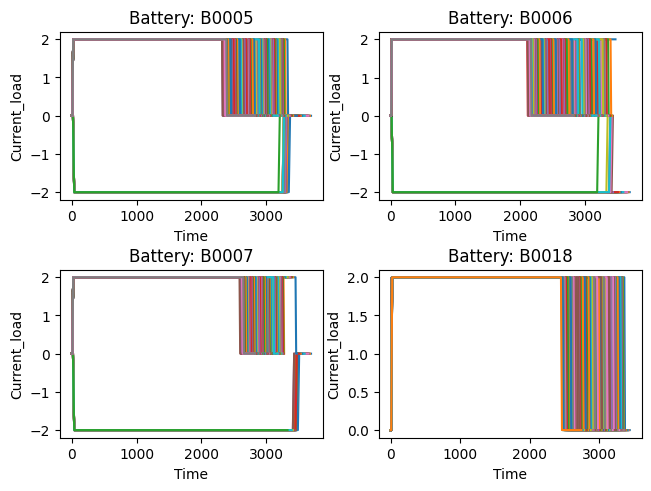

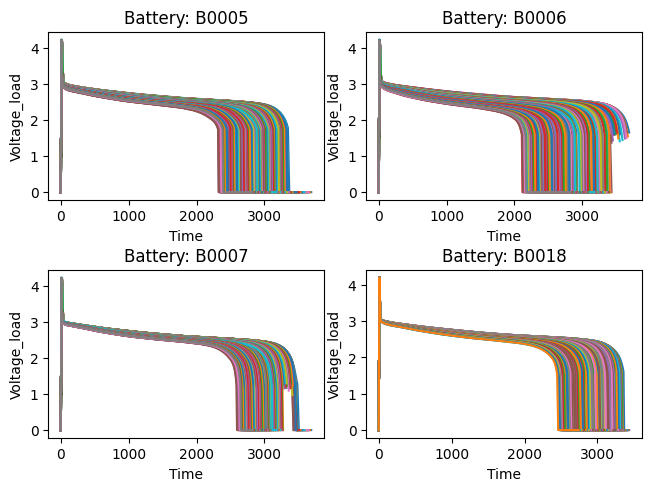

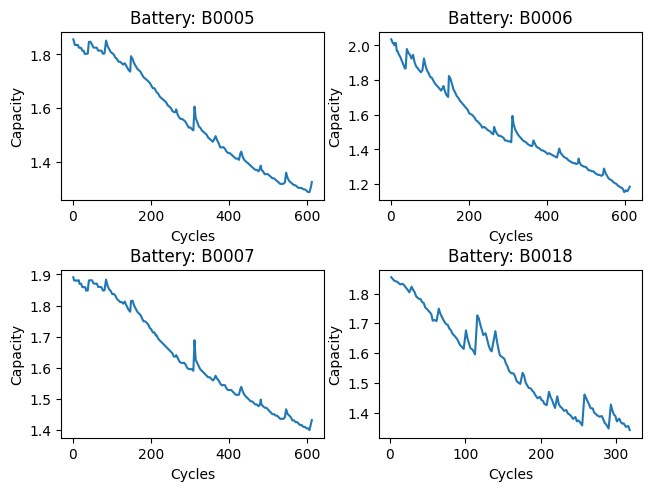

In [9]:
params = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load']

for param in params:
    fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
    for i in range(len(bs)):
        for j in range(datas[i].size):
            if types[i][j] == 'discharge':
                if i % 2 == 0:
                    axs[i // 2, 0].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0])
                    axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
                else:
                    axs[i // 2, 1].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0])
                    axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
    for ax in axs.flat:
        ax.set(ylabel = param, xlabel = 'Time')
    fig.tight_layout(pad = 0.3)

fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
for i in range(len(bs)):
    cap = []
    cycle = []
    for j in range(datas[i].size):
        if types[i][j] == 'discharge':
            cap.append(datas[i][j]['Capacity'][0][0][0][0])
            cycle.append(j)
    if i % 2 == 0:
        axs[i // 2, 0].plot(cycle, cap)
        axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
    else:
        axs[i // 2, 1].plot(cycle, cap)
        axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
        
    for ax in axs.flat:
        ax.set(ylabel = 'Capacity', xlabel = 'Cycles')
fig.tight_layout(pad = 0.3)

## Discharge First and Last Cycles

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

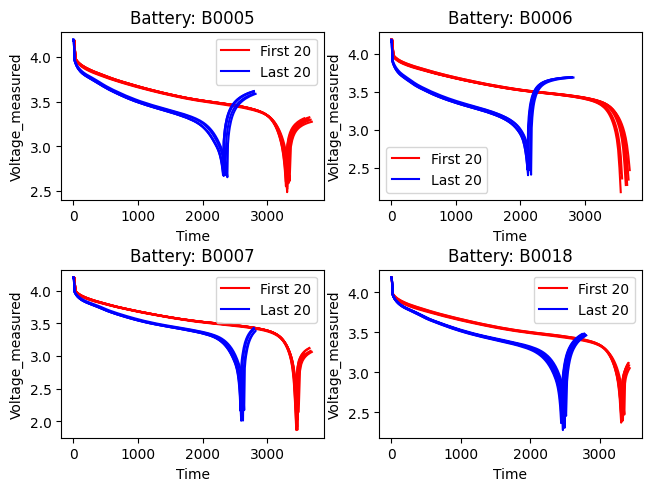

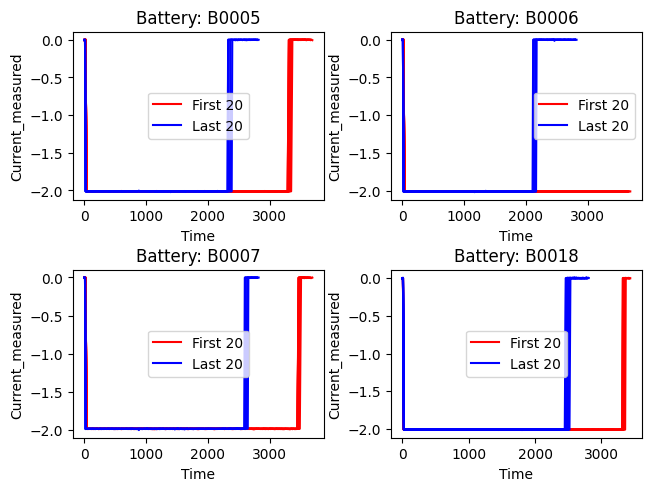

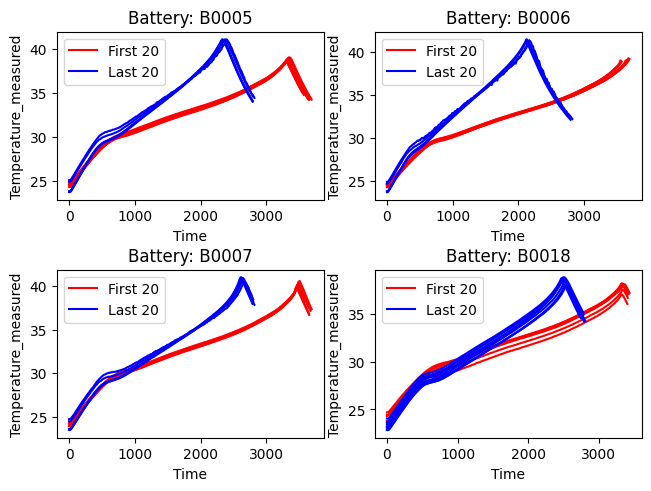

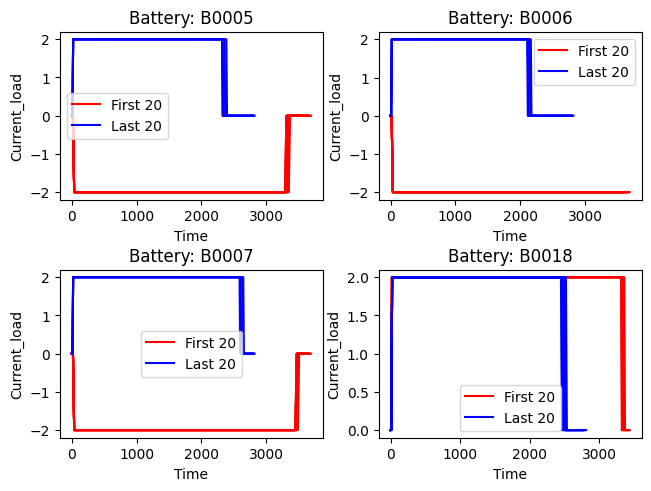

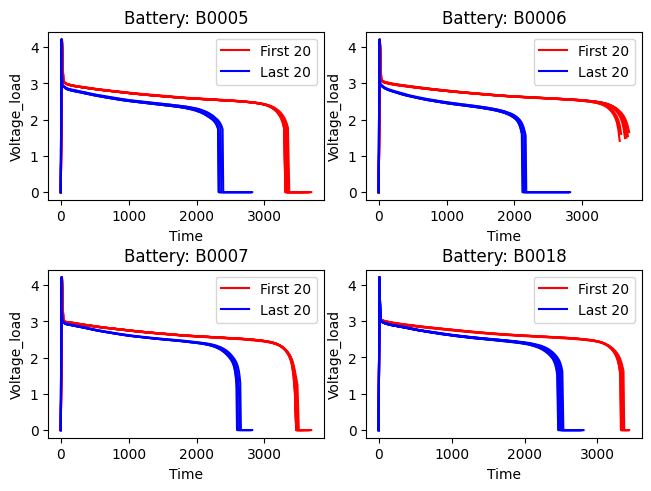

In [10]:
for p in params:
    
    # Printing first cycles
    
    fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
    param = p
    for i in range(len(bs)):
        for j in range(20):
            if types[i][j] == 'discharge':
                if i % 2 == 0:
                    axs[i // 2, 0].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], '-r')
                    axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 0].legend()
                else:
                    axs[i // 2, 1].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], '-r')
                    axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 1].legend()
#     for ax in axs.flat:
#         ax.set(ylabel = param, xlabel = 'Time')
#     fig.tight_layout(pad = 0.3)

    # Printing last cycles

#     fig, axs = plt.subplots((len(bs) + 1) // 2, 2)
    for i in range(len(bs)):
        for j in range(datas[i].size - 20, datas[i].size):
            if types[i][j] == 'discharge':
                if i % 2 == 0:
                    axs[i // 2, 0].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], '-b')
                    axs[i // 2, 0].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 0].legend()
                else:
                    axs[i // 2, 1].plot(datas[i][j]['Time'][0][0][0], datas[i][j][param][0][0][0], '-b')
                    axs[i // 2, 1].set_title(f'Battery: {bs[i]}')
                    axs[i // 2, 1].legend()

    for ax in axs.flat:
        ax.set(ylabel = param, xlabel = 'Time')
        ax.legend(['First 20', 'Last 20'])
        leg = ax.get_legend()
        leg.legendHandles[0].set_color('red')
        leg.legendHandles[1].set_color('blue')
    fig.tight_layout(pad = 0.3)

## Regression 
- From the above analysis the data seems to be very linear thus Regression is a good model to start with.
- Discharge Cycles are used for training and testing the model.

In [11]:
## Data Structure
## Cycles[battery][param][cycle]
## Cycles[battery][Capacity][cycle]

from pprint import pprint

Cycles = {}
params = ['Temperature_measured', 'Voltage_measured', 'Voltage_load', 'Time']

for i in range(len(bs)):
    Cycles[bs[i]] = {}
    Cycles[bs[i]]['count'] = 168 # This is true for battery B0005, 06, 07
    for param in params:
        Cycles[bs[i]][param] = []
        for j in range(datas[i].size):
            if types[i][j] == 'discharge':
                Cycles[bs[i]][param].append(datas[i][j][param][0][0][0])
        
    cap = []
    for j in range(datas[i].size):
        if types[i][j] == 'discharge':
            cap.append(datas[i][j]['Capacity'][0][0][0][0])
    Cycles[bs[i]]['Capacity'] = np.array(cap)

# Features Extraction

- In the given dataset every cycle is represented by set of arrays.
- Out of which Temperature, VoltageMeasured, VoltageLoad seems to best describe the cycle
- These values are measured at different time points which are represented in Time array
- Rather than using entire array for training we can extract **critical time points for each of the features** and train the model on these **critical time points**
- Only using these **critical points** will reduce the training time and reduce the noise in data

## Critical Points for a given cycle
**TEMPERATURE_MEASURED**
- Time at highest temperature
  
  
**VOLTAGE_MEASURED**
- Time at lowest Voltage
  
**VOLTAGE_LOAD**
- First time it drops below 1 volt after 1500 time

In [12]:
## CRITICAL TIME POINTS FOR A CYCLE
## We will only these critical points for furthur training

## TEMPERATURE_MEASURED
## => Time at highest temperature

## VOLTAGE_MEASURED
## => Time at lowest Voltage

## VOLTAGE_LOAD
## => First time it drops below 1 volt after 1500 time


def getTemperatureMeasuredCritical(tm, time):
    high = 0
    critical = 0
    for i in range(len(tm)):
        if (tm[i] > high):
            high = tm[i]
            critical = time[i]
    return critical

def getVoltageMeasuredCritical(vm, time):
    low = 1e9
    critical = 0
    for i in range(len(vm)):
        if (vm[i] < low):
            low = vm[i]
            critical = time[i]
    return critical

def getVoltageLoadCritical(vl, time):
    for i in range(len(vl)):
        if (time[i] > 1500 and vl[i] < 1):
            return time[i]
    return -1

In [13]:
# First Cycle
f = getTemperatureMeasuredCritical(Cycles[bs[0]]['Temperature_measured'][0], Cycles[bs[0]]['Time'][0])

# 100th Cycle
m = getTemperatureMeasuredCritical(Cycles[bs[0]]['Temperature_measured'][100], Cycles[bs[0]]['Time'][100])

# Last Cycle
l = getTemperatureMeasuredCritical(Cycles[bs[0]]['Temperature_measured'][167], Cycles[bs[0]]['Time'][167])

print(f'Temperature_Measured Critical points')
print(f'First Cycle:\t{f}')
print(f'100th Cycle:\t{m}')
print(f'Last Cycle:\t{l}')

## Conclusion
## !!BATTERY GET HOT QUICKER as they AGE!!

Temperature_Measured Critical points
First Cycle:	3366.781
100th Cycle:	2682.156
Last Cycle:	2393.578


In [14]:
# First Cycle
f = getVoltageMeasuredCritical(Cycles[bs[0]]['Voltage_measured'][0], Cycles[bs[0]]['Time'][0])

# 100th Cycle
m = getVoltageMeasuredCritical(Cycles[bs[0]]['Voltage_measured'][100], Cycles[bs[0]]['Time'][100])

# Last Cycle
l = getVoltageMeasuredCritical(Cycles[bs[0]]['Voltage_measured'][167], Cycles[bs[0]]['Time'][167])

print(f'Voltage_measured Critical points')
print(f'First Cycle:\t{f}')
print(f'100th Cycle:\t{m}')
print(f'Last Cycle:\t{l}')

## Conclusion
## !!VOLTAGE HOLDS FOR LESS TIME as they AGE!!

Voltage_measured Critical points
First Cycle:	3346.937
100th Cycle:	2662.828
Last Cycle:	2383.953


In [15]:
# First Cycle
f = getVoltageLoadCritical(Cycles[bs[0]]['Voltage_load'][0], Cycles[bs[0]]['Time'][0])

# 100th Cycle
m = getVoltageLoadCritical(Cycles[bs[0]]['Voltage_load'][100], Cycles[bs[0]]['Time'][100])

# Last Cycle
l = getVoltageLoadCritical(Cycles[bs[0]]['Voltage_load'][167], Cycles[bs[0]]['Time'][167])

print(f'Voltage_load Critical points')
print(f'First Cycle:\t{f}')
print(f'100th Cycle:\t{m}')
print(f'Last Cycle:\t{l}')

## Conclusion
## !!VOLTAGE HOLDS FOR LESS TIME as they AGE!!

Voltage_load Critical points
First Cycle:	3366.781
100th Cycle:	2672.515
Last Cycle:	2393.578


In [16]:
temperature_measured = []
voltage_measured = []
voltage_load = []
capacity = Cycles[bs[0]]['Capacity']

for i in range(Cycles[bs[0]]['count']):
    temperature_measured.append(getTemperatureMeasuredCritical(Cycles[bs[0]]['Temperature_measured'][i], Cycles[bs[0]]['Time'][i]))
    voltage_measured.append(getVoltageMeasuredCritical(Cycles[bs[0]]['Voltage_measured'][i], Cycles[bs[0]]['Time'][i]))
    voltage_load.append(getVoltageLoadCritical(Cycles[bs[0]]['Voltage_load'][i], Cycles[bs[0]]['Time'][i]))

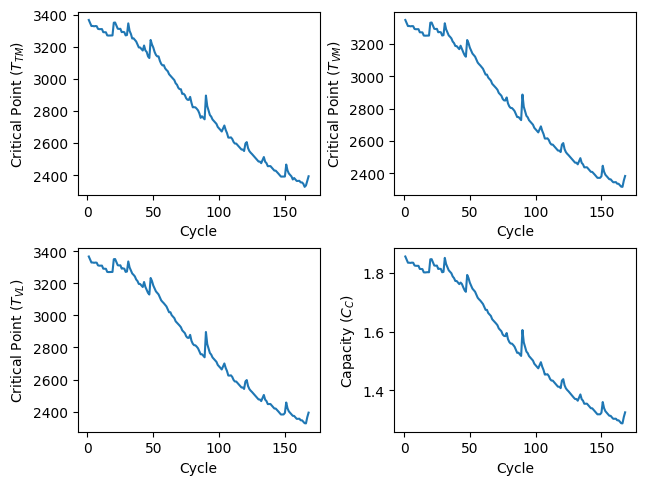

In [17]:
## Plotting (Critical Points) v/s (Cycles)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(1, len(temperature_measured) + 1), temperature_measured)
axs[0, 0].set(ylabel = "Critical Point ($T_{TM}$)", xlabel = 'Cycle')

axs[0, 1].plot(range(1, len(voltage_measured) + 1), voltage_measured)
axs[0, 1].set(ylabel = 'Critical Point ($T_{VM}$)', xlabel = 'Cycle')

axs[1, 0].plot(range(1, len(voltage_load) + 1), voltage_load)
axs[1, 0].set(ylabel = 'Critical Point ($T_{VL}$)', xlabel = 'Cycle')

axs[1, 1].plot(range(1, len(voltage_measured) + 1), capacity)
axs[1, 1].set(ylabel = 'Capacity ($C_{C}$)', xlabel = 'Cycle')

fig.tight_layout(pad = 0.5)

## Training Regression Model

In [18]:
X = []
for i in range(Cycles[bs[0]]['count']):
    X.append(np.array([temperature_measured[i], voltage_measured[i], voltage_load[i]]))
X = np.array(X)
y = np.array(capacity)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
# for i in range(len(y_test)):
#     print(f'Real:\t\t{y_test[i]}')
#     print(f'Predicted:\t{y_pred[i]}')
#     print(f'Difference:\t{(y_test[i] - y_pred[i])}')
#     print()

In [23]:
diff = 0
total = 0
for i in range(len(y_test)):
    diff += abs(y_test[i] - y_pred[i])
    total += y_test[i]
diff /= len(y_test)
total /= len(y_test)
accuracy = ((total - diff) / total) * 100
print(f'Average Difference Between Predicted and Real Capacities: {diff}')
print(f'Accuracy: {accuracy}')

Average Difference Between Predicted and Real Capacities: 0.0001504458509619957
Accuracy: 99.9903768373228


## Conclusion
* Using Dataset from 1 battery 005
* **75%** of discharge cycles are used as training data
* **25%** of discharge cycles are used as testing data
* Accuracy Obtained **99.9903768373228**
* Average difference between Predicted and Real Capacity **0.0001504458509620327**

## Regression Model 2
* Using battery 005, 006 and 007
* Using multiple battries to get an proper effectiveness of the model

In [28]:
temperature_measured = []
voltage_measured = []
voltage_load = []
capacity = []

# Assuming Cycles is a dictionary with necessary data
for b in bs:
    if 'Capacity' in Cycles[b]:
        for c in Cycles[b]['Capacity']:
            capacity.append(c)

for battery in bs:
    # Find the minimum length among all relevant lists to avoid out-of-range errors
    min_length = min(len(Cycles[battery].get('Temperature_measured', [])),
                     len(Cycles[battery].get('Time', [])),
                     len(Cycles[battery].get('Voltage_measured', [])),
                     len(Cycles[battery].get('Voltage_load', [])))

    for i in range(min_length):
        try:
            temp_meas = Cycles[battery]['Temperature_measured'][i]
            time_meas = Cycles[battery]['Time'][i]
            voltage_meas = Cycles[battery]['Voltage_measured'][i]
            voltage_load_meas = Cycles[battery]['Voltage_load'][i]

            temperature_measured.append(getTemperatureMeasuredCritical(temp_meas, time_meas))
            voltage_measured.append(getVoltageMeasuredCritical(voltage_meas, time_meas))
            voltage_load.append(getVoltageLoadCritical(voltage_load_meas, time_meas))
        except IndexError as e:
            print(f"IndexError for battery {battery}, cycle {i}: {e}")
        except KeyError as e:
            print(f"KeyError for battery {battery}, cycle {i}: {e}")

# Print the lengths of the collected data for verification
print(f"Length of temperature_measured: {len(temperature_measured)}")
print(f"Length of voltage_measured: {len(voltage_measured)}")
print(f"Length of voltage_load: {len(voltage_load)}")
print(f"Length of capacity: {len(capacity)}")

Length of temperature_measured: 636
Length of voltage_measured: 636
Length of voltage_load: 636
Length of capacity: 636


## Training the Model

In [29]:
X = []
for i in range(len(temperature_measured)):
    X.append(np.array([temperature_measured[i], voltage_measured[i], voltage_load[i]]))
X = np.array(X)
y = np.array(capacity)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Prediction and Analysis

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
diff = 0
total = 0
for i in range(len(y_test)):
    diff += abs(y_test[i] - y_pred[i])
    total += y_test[i]
diff /= len(y_test)
total /= len(y_test)
accuracy = ((total - diff) / total) * 100
print(f'Average Difference Between Predicted and Real Capacities: {diff}')
print(f'Accuracy: {accuracy}')

Average Difference Between Predicted and Real Capacities: 0.01118529817399774
Accuracy: 99.29725832296832


## Conclusion
* Using Dataset from 3 batteries 005, 006 and 007
* A new dataset was fromed by mixing cycles from this battries
* **75%** of discharge cycles are used as training data
* **25%** of discharge cycles are used as testing data
* Accuracy Obtained **99.15812921489568**
* Average difference between Predicted and Real Capacity **0.013404734961093144**

## Final Conclusion and effectiveness of the model
* When multiple battries are considered simultaneously for training and testing the model yields an accuracy of **99.15812921489568**

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
# Create a decision tree regressor object
dtr.fit(X_train, y_train)
# Train the model using the training sets
# Predicting a new result
y_pred = dtr.predict(X_test)
# Predicting the test set results

In [35]:
diff = 0
total = 0
for i in range(len(y_test)):
    diff += abs(y_test[i] - y_pred[i])
    total += y_test[i]
diff /= len(y_test)
total /= len(y_test)
accuracy = ((total - diff) / total) * 100
print(f'Average Difference Between Predicted and Real Capacities: {diff}')
print(f'Accuracy: {accuracy}')

Average Difference Between Predicted and Real Capacities: 0.012500671812829127
Accuracy: 99.21461699660435


In [36]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor()
# Create a random forest regressor object
rnd
# Fit the random forest regressor to the data
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

In [37]:
diff = 0
total = 0
for i in range(len(y_test)):
    diff += abs(y_test[i] - y_pred[i])
    total += y_test[i]
diff /= len(y_test)
total /= len(y_test)
accuracy = ((total - diff) / total) * 100
print(f'Average Difference Between Predicted and Real Capacities: {diff}')
print(f'Accuracy: {accuracy}')

Average Difference Between Predicted and Real Capacities: 0.010739916814556065
Accuracy: 99.32524041504882


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [39]:
diff = 0
total = 0
for i in range(len(y_test)):
    diff += abs(y_test[i] - y_pred[i])
    total += y_test[i]
diff /= len(y_test)
total /= len(y_test)
accuracy = ((total - diff) / total) * 100
print(f'Average Difference Between Predicted and Real Capacities: {diff}')
print(f'Accuracy: {accuracy}')

Average Difference Between Predicted and Real Capacities: 0.010906898476100038
Accuracy: 99.3147494141795
